# Interactive Analysis with Pandas

## Introducing Pandas
Pandas organizes your data into objects that resemble an Excel spreadsheet, called dataframes. 

Then you can easily perform calculations, grouping and sorting on columns and rows. 

Let's pull in that iris dataset again: 

In [85]:
import pandas as pd

# url to get file from
url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/iris/iris.data"

# create headers
headers = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

# read the file into a dataframe
iris = pd.read_csv(url, header=None, names=headers)

In [86]:
print(iris.head()) 

   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109a51f98>]], dtype=object)

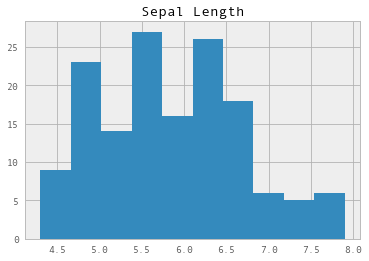

In [87]:
# I use two brackets around 'Sepal Length' to force pandas to make this
# a data frame rather than just a series, which is like a numpy array.
# The brackets here aren't necessary, but makes printing sepal_lengths
# prettier and makes it easier for us to combine sepal_lengths with other
# data.
sepal_lengths = iris[['Sepal Length']]

# Make the plot pretty!
pd.set_option('display.mpl_style', 'default')

sepal_lengths.hist()

## Working with columns

#### Selecting a column and the first 10 rows

In [88]:
iris['Class'][1:10]

1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Class, dtype: object

#### Selecting multiple columns

In [89]:
iris[['Class', 'Sepal Length']][1:10]

Class  Sepal Length
1  Iris-setosa           4.9
2  Iris-setosa           4.7
3  Iris-setosa           4.6
4  Iris-setosa           5.0
5  Iris-setosa           5.4
6  Iris-setosa           4.6
7  Iris-setosa           5.0
8  Iris-setosa           4.4
9  Iris-setosa           4.9

#### How many different irises are in each class? 

In [90]:
iris['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

#### Let's plot the counts

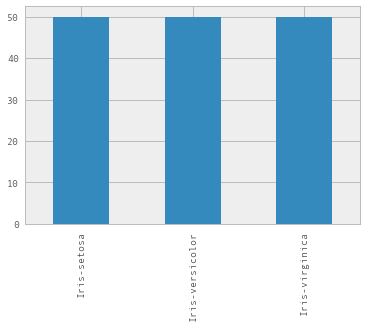

In [91]:
iris['Class'].value_counts().plot(kind='bar')

#### Get unique elements of a column

In [92]:
iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Plotting a column

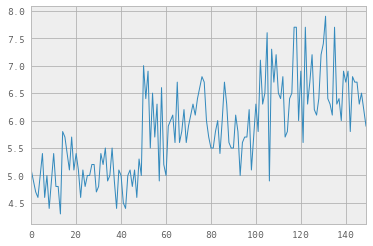

In [93]:
iris['Sepal Length'].plot()

#### Subsetting Data
Let's select only data for the Iris-virginica class. 

In [94]:
virginica = iris[iris['Class'] == "Iris-virginica"]

In [95]:
virginica.head()

Sepal Length  Sepal Width  Petal Length  Petal Width           Class
100           6.3          3.3           6.0          2.5  Iris-virginica
101           5.8          2.7           5.1          1.9  Iris-virginica
102           7.1          3.0           5.9          2.1  Iris-virginica
103           6.3          2.9           5.6          1.8  Iris-virginica
104           6.5          3.0           5.8          2.2  Iris-virginica

In [96]:
len(virginica)

50

## Calculations on a column

In [97]:
max(virginica['Sepal Length'])

7.9000000000000004

In [98]:
sum(virginica['Sepal Length'])

329.39999999999992

In [99]:
len(virginica['Sepal Length'])

50

In [100]:
virginica['Sepal Length'].mean()

6.5879999999999983

In [84]:
virginica.describe()

Sepal Length  Sepal Width  Petal Length  Petal Width
count      50.00000    50.000000     50.000000     50.00000
mean        6.58800     2.974000      5.552000      2.02600
std         0.63588     0.322497      0.551895      0.27465
min         4.90000     2.200000      4.500000      1.40000
25%         6.22500     2.800000      5.100000      1.80000
50%         6.50000     3.000000      5.550000      2.00000
75%         6.90000     3.175000      5.875000      2.30000
max         7.90000     3.800000      6.900000      2.50000

## Writing to a file
Let's write our virginica subset back out to a csv file. 

In [ ]:
virginica.to_csv("virginica_subset.csv")


Or as a TSV (tab-separated) file. 

In [ ]:
virginica.to_csv("virginica_subset.csv", sep="\t")

If you run into errors, try adding the proper encoding type for your operating system: 

In [ ]:
virginica.to_csv("virginica_subset.csv", sep="\t", encoding='utf-8')